In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import mean
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
student_spending = pd.read_csv("C:/Users/Jerome/Documents/0000_Work_Files/0000_Montgomery_College/Data_Science_201/240411_Project_2/student_spending.csv")

In [3]:
print(student_spending)

     Unnamed: 0  age      gender year_in_school             major  \
0             0   19  Non-binary      aFreshman        Psychology   
1             1   24      Female        cJunior         Economics   
2             2   24  Non-binary        cJunior         Economics   
3             3   23      Female        dSenior  Computer Science   
4             4   20      Female        dSenior  Computer Science   
..          ...  ...         ...            ...               ...   
995         995   22      Female        dSenior           Biology   
996         996   19      Female        dSenior           Biology   
997         997   20        Male        cJunior         Economics   
998         998   22  Non-binary        dSenior         Economics   
999         999   24  Non-binary     bSophomore  Computer Science   

     monthly_income  financial_aid  tuition  housing  food  transportation  \
0               958            270     5939      709   296             123   
1              

In [4]:
student_spending['monthly_income'].describe()

count   1000.00
mean    1020.65
std      293.84
min      501.00
25%      770.75
50%     1021.00
75%     1288.25
max     1500.00
Name: monthly_income, dtype: float64

In [5]:
correlations = student_spending[['monthly_income', 'tuition']].corr()
print(correlations)

                monthly_income  tuition
monthly_income            1.00    -0.00
tuition                  -0.00     1.00


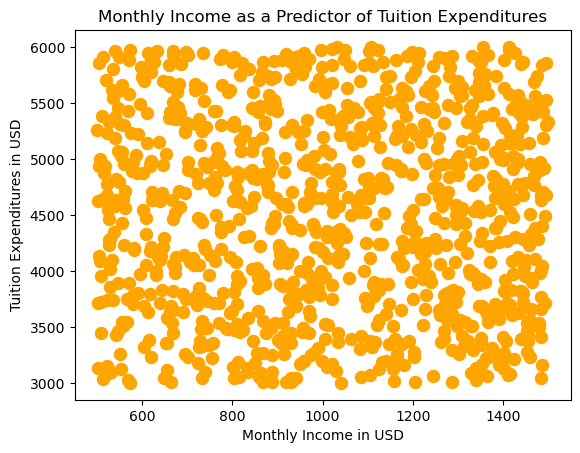

In [6]:
student_spending.plot.scatter(x='monthly_income', y='tuition', s =75, c = "orange")
plt.title('Monthly Income as a Predictor of Tuition Expenditures')
plt.xlabel('Monthly Income in USD')
plt.ylabel('Tuition Expenditures in USD')
#plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [7]:
correlations = student_spending[['monthly_income', 'financial_aid']].corr()
print(correlations)

                monthly_income  financial_aid
monthly_income            1.00           0.04
financial_aid             0.04           1.00


In [8]:
correlations = student_spending[['monthly_income', 'food']].corr()
print(correlations)

                monthly_income  food
monthly_income            1.00 -0.02
food                     -0.02  1.00


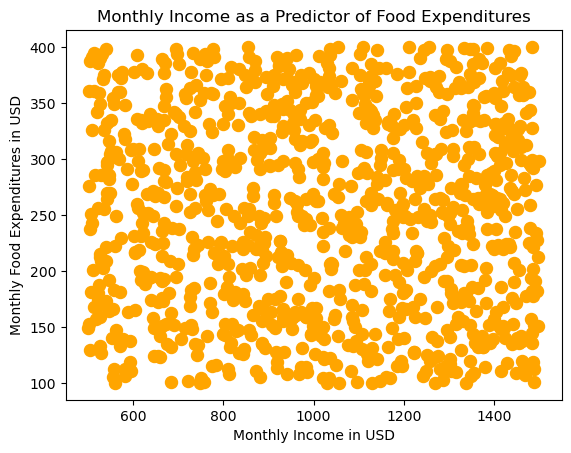

In [9]:
student_spending.plot.scatter(x='monthly_income', y='food', s =75, c = "orange")
plt.title('Monthly Income as a Predictor of Food Expenditures')
plt.xlabel('Monthly Income in USD')
plt.ylabel('Monthly Food Expenditures in USD')
#plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Text(0.5, 0, 'Year in School')

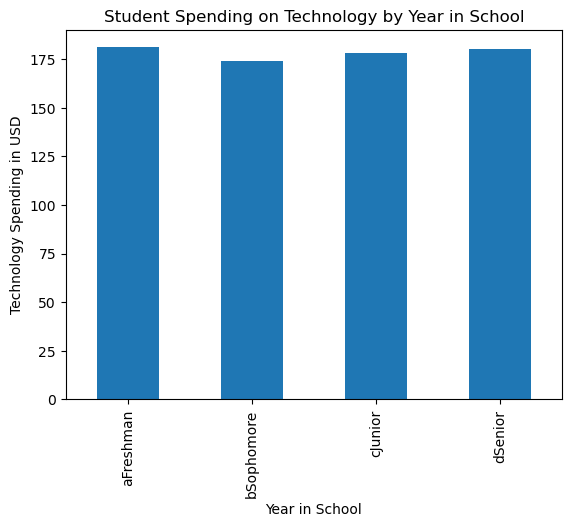

In [10]:
plot = student_spending.groupby('year_in_school')['technology'].mean().plot(kind='bar')
plt.title('Student Spending on Technology by Year in School')
plt.ylabel('Technology Spending in USD')
plt.xlabel('Year in School')

Text(0.5, 0, 'Preferred Payment Method')

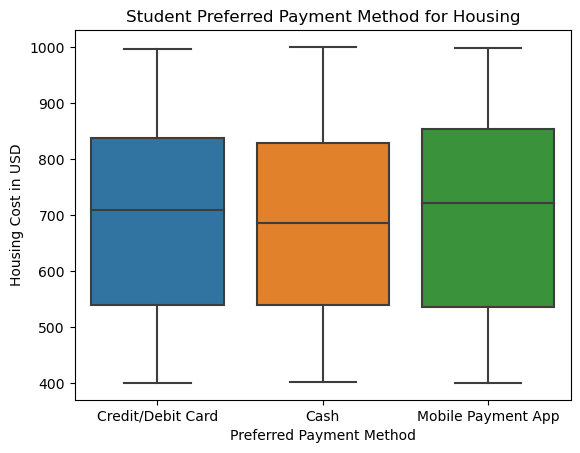

In [11]:
sns.boxplot(data=student_spending, x="preferred_payment_method", y="housing")
plt.title('Student Preferred Payment Method for Housing')
plt.ylabel('Housing Cost in USD')
plt.xlabel('Preferred Payment Method')

In [12]:
freq_table = pd.crosstab(student_spending['major'], 'major') 
  
freq_table 

col_0,major
major,
Biology,228
Computer Science,192
Economics,204
Engineering,192
Psychology,184


In [13]:
pd.crosstab(student_spending.year_in_school, student_spending.major)

major,Biology,Computer Science,Economics,Engineering,Psychology
year_in_school,,,,,
aFreshman,57,53,44,47,52
bSophomore,57,46,56,40,47
cJunior,61,46,48,48,44
dSenior,53,47,56,57,41


In [14]:
 #Use scikit-learn for linear regression to predict financial aid from income and tuition costs.
# Preparing the data for training
X = student_spending[["monthly_income", "tuition"]]  # Features
y = student_spending["financial_aid"]  # Target variable

In [15]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print("r^2 = ", result)

r^2 =  -0.0052552222978761165


In [17]:
# Training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
print(model.intercept_)

423.7564419600918


In [19]:
print(model.coef_)

[0.03955134 0.00776902]


In [20]:
model.score(X_train, y_train)

0.002113373958642195

In [21]:
# Making predictions on the test set
predictions = model.predict(X_test)

In [22]:
# Calculating the Root Mean Squared Error (RMSE) as the performance metric
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(rmse)
#"""
 #Interpretation of the RMSE score:
#The RMSE indicates the average deviation of the predicted financial aid from the actual financial aid.
#A lower RMSE value indicates a better fit to the data.

279.6524086378443


In [23]:
# Calculate residuals
residuals = y_test - predictions

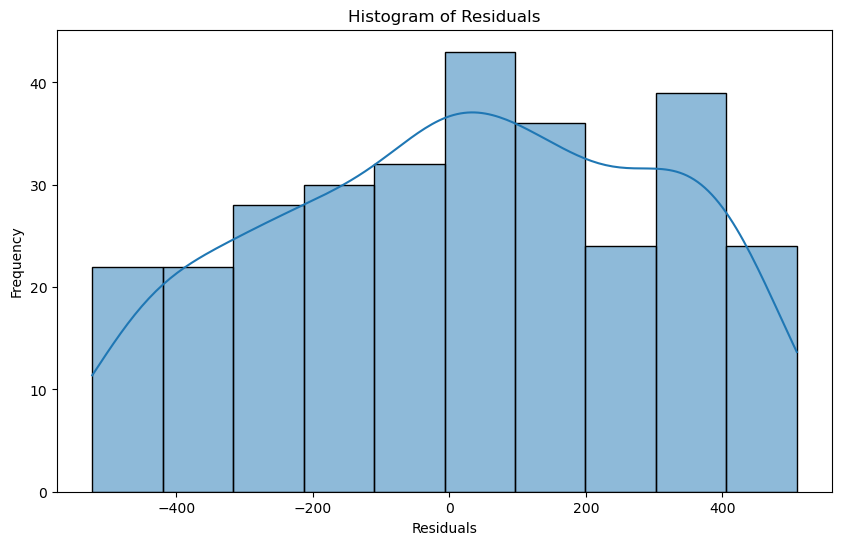

In [24]:
# Plotting the histogram of the residuals with a KDE
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=10)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [25]:
#correlations = model[[predictions, residuals]].corr()
#print(correlations)

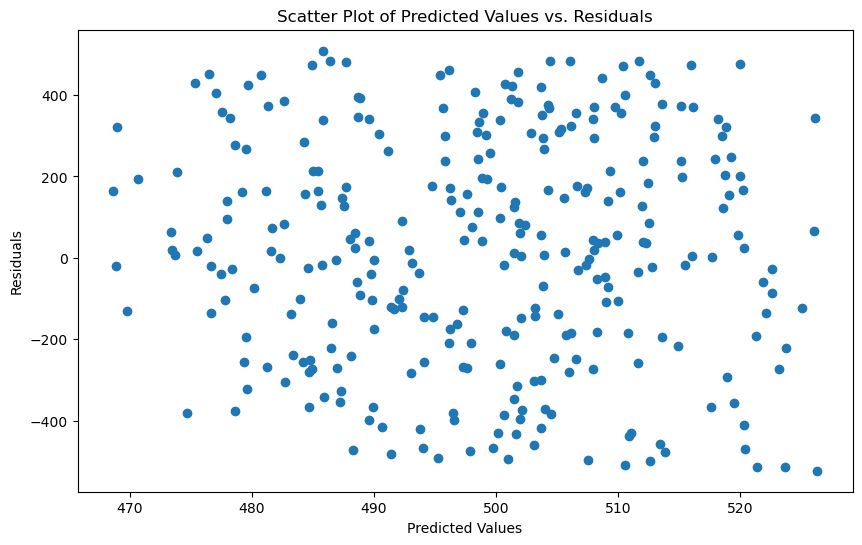

In [26]:
# Scatter plot of predicted values vs residuals to check the assumption of homoscedasticity
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals)
plt.title('Scatter Plot of Predicted Values vs. Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
#plt.axhline(y=0, color='r', linestyle='--')
plt.show()